In [66]:
import numpy as np
#from sklearn.datasets import load_digits

from sklearn import datasets
import math

import matplotlib.pyplot as plt

In [67]:
X, y = load_digits(return_X_y = True)

In [69]:
n_samples, n_features = X.shape

def euclidean_distance(x1, x2):
    distance = 0
    
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
        
    return math.sqrt(distance)

def calculate_correlation_matrix(X, Y=None):
    """ Calculate the correlation matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance = (1 / n_samples) * (X - X.mean(0)).T.dot(Y - Y.mean(0))
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)

def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

In [72]:
cmap = plt.get_cmap('viridis')

def _transform(X, dim):
        covariance = calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        # Sort eigenvalues and eigenvector by largest eigenvalues
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:dim]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :dim]
        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
def plot_in_2d(X, y=None, title=None, accuracy=None, legend_labels=None):
    X_transformed = _transform(X, dim=2)
    x1 = X_transformed[:, 0]
    x2 = X_transformed[:, 1]
    class_distr = []

    y = np.array(y).astype(int)

    colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

    # Plot the different class distributions
    for i, l in enumerate(np.unique(y)):
        _x1 = x1[y == l]
        _x2 = x2[y == l]
        _y = y[y == l]
        class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

    # Plot legend
    if not legend_labels is None: 
        plt.legend(class_distr, legend_labels, loc=1)

    # Plot title
    if title:
        if accuracy:
            perc = 100 * accuracy
            plt.suptitle(title)
            plt.title("Accuracy: %.1f%%" % perc, fontsize=10)
        else:
            plt.title(title)

    # Axis labels
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()


In [64]:
class KMeans():
    def __init__(self, k=2, max_iterations=200):
        self.k = k
        self.max_iterations = max_iterations
        
    def _init_random_centroids(self, X):
        
        n_samples, n_features = X.shape
        centroids = np.zeros((self.k, n_features))
        
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids
    
    def _closest_centroid(self, sample, centroids):
        
        closest_i = 0
        closest_dist = float('inf')
        
        for i, centroid in enumerate(centroids):
            distance = euclidean_distance(sample, centroid)
            
            if distance < closest_dist:
                closest_i=i
                closest_dist = distance
        
        return closest_i
    
    def _create_clusters(self, centroids, X):
        
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        
        for sample_i, sample in enumerate(X):
            centroid_i =  self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters
    
    def _calculate_centroids(self, clusters, X):
        
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
            
        return centroids
    
    def _get_cluster_labels(self, clusters, X):
        
        y_pred = np.zeros(np.shape(X)[0])
        
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        
        return y_pred
    
    
    def predict(self, X):
        
        centroids = self._init_random_centroids(X)
        
        for _ in range(self.max_iterations):
            clusters = self._create_clusters(centroids, X)
            
            prev_centroids = centroids
            
            centroids = self._calculate_centroids(clusters, X)
            
            diff = centroids - prev_centroids
            
            if not diff.any():
                break
                
        
        return self._get_cluster_labels(clusters, X)
    
    
        

In [77]:
X,y = datasets.make_blobs()
#X,y = datasets.load_digits(return_X_y=True)

clf = KMeans(k=3)
y_pred = clf.predict(X)

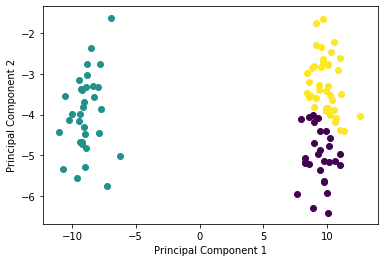

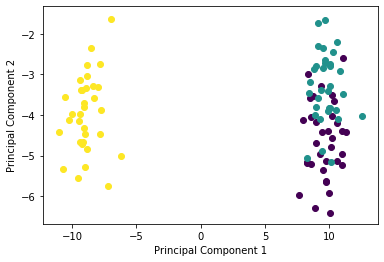

In [78]:
plot_in_2d(X, y_pred)
plot_in_2d(X,y)